#Ejemplo 1: Aproximación de una función con regresión lineal

---



**Objetivo y comprensión del problema**

El objetivo de este problema es aproximar una función **f(x) = 2x + 5 + α**, siendo un α un valor aleatorio  mediante la aplicación de técnicas de Deep Learning. 

Para ello, inicialmente se generarán datos sintéticos atendiendo a esta función. Posteriormente, se separarán los datos en entrenamiento y test. Finalmente, se mostrará cómo se ajusta la predicción a los valores reales.

## Paso 1: Gestión de los datos


En primer lugar, se define la función objetivo.

Para la configuración de las bibliotecas a importar, se incluye NumPy, Keras y Matplotlib (para la visualización)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 

*   Se generan los valores de X como un array de 100 números entre -1 y .
*   Se puede ver la documentación de esta función en el siguiente [enlace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).


In [0]:
x = np.linspace(-1, 1, 100)

*   Se puede ver el resultado mostrando por pantalla x.




In [5]:
print (x)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

*  Se inicia el generador de números aleatorios con la función random de NumPy.
*   Se puede ver la documentación de esta función en el siguiente [enlace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState).
*  Se barajan los valores generados de x.



In [0]:
np.random.seed(1000)
np.random.shuffle(x) 

A continuación, se define nuestra función fx y se cargan los valores.

In [0]:
fx =  2 * x + 5 + np.random.normal(0, 0.05, (100, ))

**1.2-Visualización de los datos**

Se muestran los valores de x y fx en el cual debe salir una función de carácter lineal.

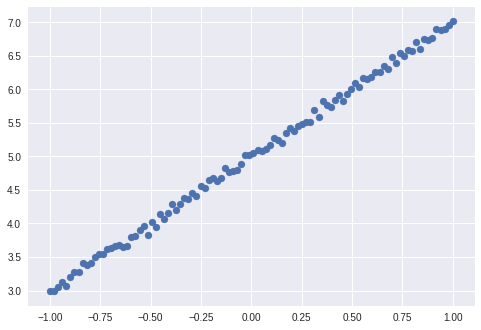

In [8]:
plt.scatter(x, fx)
plt.show()

**1.3-Codificar los datos**

En este caso los datos ya son numéricos con lo que no es necesario realizar ninguna acción.

**1.4-Seleccionar los datos**

En este caso, se particiona el conjunto de datos de entrada entre entrenamiento y test.

*   Se divide el conjunto de datos entre entranmiento y test.
*   Para ello, se seleccionan los 20 últimos datos para entrenamiento y los 80 primeros para test.
*  Se puede ver la documentación de la indexación de arrays en el siguiente [enlace](https://docs.scipy.org/doc/numpy-1.10.4/reference/arrays.indexing.html).

In [0]:
x_train, fx_train = x[:80], fx[:80]     
x_test, fx_test = x[80:], fx[80:]    

## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será un sólo valor por lo que su dimensión será 1.
2.   La salida de nuestra red será un sólo valor por lo que su dimensión será 1.
3.   La función de pérdida seleccionada es mínimos cuadrados (mse). Se pueder ver más información en el siguiente [enlace](https://keras.io/losses/).
4.   El optimizador de nuestro modelo será *stochastic gradient descent* (sgd). Se puede ver más información en el siguiente [enlace](https://keras.io/optimizers/).

Otras referencias interesantes:

*   [Funciones de pérdida](http://ruder.io/optimizing-gradient-descent/).






In [10]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
model.compile(loss='mse', optimizer='sgd')

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Paso 3:  Entrenamiento

A continuación, se procede al entrenamiento por lotes, en el cual se dividen los datos y se va entrenando con cada uno de los lotes. Se realiza esta acción durante 300 iteraciones.

In [12]:
print('---Entrenamiento---')
for it in range(1,301):
    cost = model.train_on_batch(x_train, fx_train)
    if it % 100 == 0:
      print("Coste: ", cost)
     

---Entrenamiento---
Instructions for updating:
Use tf.cast instead.
Coste:  0.6368683
Coste:  0.056168508
Coste:  0.014140284


## Paso 4:  Test

El tamaño del batch implicará cómo el algoritmo tomará los datos de entrenamiento y test. En este ejemplo, seleccionado 50, tomará los 50 primeros valores para el entrenamiento (1-50), después los segundos 50, etc.

Este tamaño del batch deberá ser, en general, menor que el tamaño muestral. Esto trae consigo unas ventajas:
* Se requiere menos memeoria ya que el algoritmo utiliza menos datos para el entrenamiento.
* El entrenamiento toma menos tiempo ya que el tiempo para actualizar los pesos en cada propagación es menor. Este puede ser un enfoque válido cuando no se dispone de la memoria necesaria en la máquin.

Por contra, hay que considerar el siguiente factor:
* A medida que el tamaño del batch es menor la dirección del gradiente de salida será peor ya que es más difícil de estimar con menos muestras.

In [13]:
print('---Prueba---')
cost = model.evaluate(x_test, fx_test, batch_size=50)
print('Coste:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

---Prueba---
20/20 [==============================] - 0s 930us/step
Coste: 0.011046787723898888
Weights= [[1.8258469]] 
biases= [4.9871306]


## Paso 5: Predicción

A continuación, se procede a realizar una predicción con los datos de prueba para ver cómo encajan con la recta. Se visualizan los datos y la aproximación lineal. 

Se puede ver como la recta que se ha inferido encaja perfectamente con los puntos de prueba.

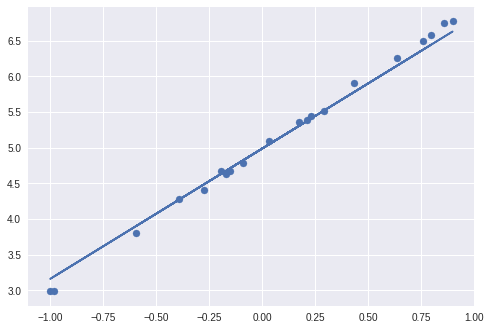

In [14]:
fx_pred = model.predict(x_test)
plt.scatter(x_test, fx_test)
plt.plot(x_test, fx_pred)
plt.show()

##Tareas


1.   Cambiar el tipo de la función de pérdida y ver cómo afecta al resultado.
2.   Cambiar el número de iteraciones del entrenamiento y ver cómo converge.
3.   Cambiar la función de optimización y ver cómo afecta al resultado.



*   Listado de funciones de pérdida en Keras:



In [15]:
from keras import losses
dir(losses)

['K',
 'KLD',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'binary_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine',
 'cosine_proximity',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'get',
 'hinge',
 'kld',
 'kullback_leibler_divergence',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'print_function',
 'serialize',
 'serialize_keras_object',
 'six',
 'sparse_categorical_crossentropy',
 'squared_hinge']

* Listado de optimizadores en Keras:

In [2]:
from keras import optimizers
dir(optimizers)

['Adadelta',
 'Adagrad',
 'Adam',
 'Adamax',
 'K',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 'TFOptimizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'adadelta',
 'adagrad',
 'adam',
 'adamax',
 'clip_norm',
 'copy',
 'deserialize',
 'deserialize_keras_object',
 'division',
 'get',
 'interfaces',
 'nadam',
 'print_function',
 'rmsprop',
 'serialize',
 'serialize_keras_object',
 'sgd',
 'six',
 'tf',
 'zip']

* Fuente original: https://www.kaggle.com/xgdbigdata/keras-regression-tutorial